In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
data = pd.read_csv("heart.csv")

In [27]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

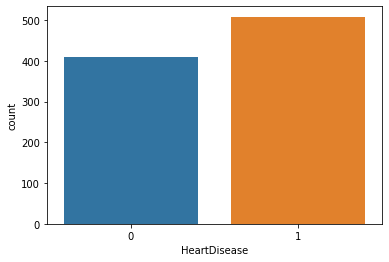

In [28]:
sns.countplot(data["HeartDisease"])

In [29]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 2, 6, 8, 10])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [31]:
ct.get_feature_names()

c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['encoder__x0_F',
 'encoder__x0_M',
 'encoder__x1_ASY',
 'encoder__x1_ATA',
 'encoder__x1_NAP',
 'encoder__x1_TA',
 'encoder__x2_LVH',
 'encoder__x2_Normal',
 'encoder__x2_ST',
 'encoder__x3_N',
 'encoder__x3_Y',
 'encoder__x4_Down',
 'encoder__x4_Flat',
 'encoder__x4_Up',
 'x0',
 'x3',
 'x4',
 'x5',
 'x7',
 'x9']

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [34]:
y_predlr = lr.predict(X_test)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
logimean = cross_val_score(estimator=lr, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predlr))
print(logimean.mean())

0.1509433962264151
0.8468379446640316


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predlr)
cm

array([[262,  38],
       [ 66, 323]], dtype=int64)

In [37]:
import pickle
file = open('heart.pkl', 'wb')
pickle.dump(lr, file)
file.close()